In [ ]:
# Objective

The objective of this Jupyter Notebook is to analyze and forecast web traffic data using various data analysis and visualization techniques. We will utilize the Adobe Analytics API to extract data, perform time series analysis, and visualize the results using different Python libraries.

# Overview

1. **Data Extraction**: We will use the `cjapy` library to extract data from Customer Journey Analytics. The data will include metrics such as visits and orders over a specified date range.

2. **Data Preprocessing**: The extracted data will be preprocessed to convert day-of-year values to actual dates and sort the data accordingly. We will also ensure that the metrics are in the correct format for analysis.

3. **Time Series Analysis**: We will perform time series analysis using the Prophet model to forecast future values. This will include fitting the model to historical data and generating forecasts for the next 90 days.

4. **Visualization**: Various visualization techniques will be employed to understand the data better. This includes:
    - Line plots to visualize daily orders over time.
    - Histograms to understand the distribution of daily orders.
    - Interactive plots using Plotly for better data exploration.
    - Rolling statistics to observe trends and patterns.
    - Seasonal decomposition to analyze the observed, trend, seasonal, and residual components of the time series data.

5. **Statistical Analysis**: We will use statistical methods to decompose the time series data into its components and understand the underlying patterns and trends.

6. **Volatility Modeling**: We will use the GARCH model to analyze the volatility of the time series data.

By the end of this notebook, we aim to have a comprehensive understanding of the web traffic data and be able to make informed predictions about future trends.

In [17]:
import cjapy
from datetime import datetime, timedelta
import plotly.graph_objs as go
import json

# Load the configuration and initialize the CJA object
cjapy.importConfigFile("myconfig.json")
cja = cjapy.CJA()

# Specify the Data View ID for analysis
data_view = "dv_677ea9291244fd082f02dd42"

In [18]:
# Function to convert day of year to date
def day_of_year_to_date(year, day_of_year):
    day_of_year = int(day_of_year)  # Convert to integer
    return (datetime(year, 1, 1) + timedelta(day_of_year - 1)).strftime('%Y-%m-%d')

# Pick dimension and metric
dimension = "variables/timepartdayofyear"
metric = "metrics/visits"
dateRange = "2024-01-01T00:00:00.000/2024-12-31T00:00:00.000"

# Define the report request
myRequest = cjapy.RequestCreator()
myRequest.setDataViewId(data_view)
myRequest.setDimension(dimension)
myRequest.addMetric(metric)
myRequest.addGlobalFilter(dateRange)

# Pull and print the report from CJA
myReport = cja.getReport(myRequest)

# Convert day of year to date and sort the dataframe
sorted_df = myReport.dataframe.copy()
sorted_df[dimension] = sorted_df[dimension].apply(lambda x: day_of_year_to_date(2024, x))
sorted_df.sort_values(by=dimension, inplace=True)

# Convert "metrics/visits" column to whole numbers
sorted_df[metric] = sorted_df[metric].astype(int)

# Print the sorted dataframe with dimension and metric
print(sorted_df[[dimension, metric]])

    variables/timepartdayofyear  metrics/visits
172                  2024-01-01             508
17                   2024-01-02             857
41                   2024-01-03             727
72                   2024-01-04             647
176                  2024-01-05             501
269                  2024-01-06             364
266                  2024-01-07             371
42                   2024-01-08             718
88                   2024-01-09             621
21                   2024-01-10             829
28                   2024-01-11             783
43                   2024-01-12             716
197                  2024-01-13             481
164                  2024-01-14             521
223                  2024-01-15             446
55                   2024-01-16             681
102                  2024-01-17             603
118                  2024-01-18             581
61                   2024-01-19             667
206                  2024-01-20         

In [19]:
from prophet import Prophet
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Prepare data for Prophet (requires 'ds' and 'y' columns)
df = pd.DataFrame({
    'ds': sorted_df[dimension],
    'y': sorted_df[metric]
})

# Initialize and fit Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)
model.fit(df)

# Create future dates dataframe for forecasting
future_dates = model.make_future_dataframe(periods=90)
forecast = model.predict(future_dates)

# Create plot
fig = go.Figure()

# Plot historical data
fig.add_trace(go.Scatter(
    x=df['ds'],
    y=df['y'],
    mode='lines',
    name='Historical Visits'
))

# Plot forecasted data
fig.add_trace(go.Scatter(
    x=forecast['ds'].tail(90),
    y=forecast['yhat'].tail(90),
    mode='lines+markers',
    name='Forecast',
    line=dict(dash='dot')
))

# Add confidence intervals
fig.add_trace(go.Scatter(
    x=pd.concat([forecast['ds'].tail(90), forecast['ds'].tail(90)[::-1]]),
    y=pd.concat([forecast['yhat_lower'].tail(90), forecast['yhat_upper'].tail(90)[::-1]]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Band'
))

# Update layout
fig.update_layout(
    title='Forecast of Visits Over Time using Prophet',
    xaxis_title='Date',
    yaxis_title='Visits',
    legend=dict(y=0.5, traceorder='reversed')
)

# Show plot
fig.show()

15:45:59 - cmdstanpy - INFO - Chain [1] start processing
15:45:59 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Function to convert day of year to date
def day_of_year_to_date(year, day_of_year):
    day_of_year = int(day_of_year)  # Convert to integer
    return (datetime(year, 1, 1) + timedelta(day_of_year - 1)).strftime('%Y-%m-%d')

# Pick dimension and metric
dimension = "variables/timepartdayofyear"
metric = "metrics/orders"
dateRange = "2024-01-01T00:00:00.000/2025-01-01T00:00:00.000"

# Define the report request
myRequest = cjapy.RequestCreator()
myRequest.setDataViewId(data_view)
myRequest.setDimension(dimension)
myRequest.addMetric(metric)
myRequest.addGlobalFilter(dateRange)

# Pull and print the report from CJA
myReport = cja.getReport(myRequest)

# Convert day of year to date and sort the dataframe
sorted_df = myReport.dataframe.copy()
sorted_df[dimension] = sorted_df[dimension].apply(lambda x: day_of_year_to_date(2024, x))
sorted_df.sort_values(by=dimension, inplace=True)

# Convert "metrics/orders" column to whole numbers
sorted_df[metric] = sorted_df[metric].astype(int)

# Print the sorted dataframe with dimension and metric
print(sorted_df[[dimension, metric]])

    variables/timepartdayofyear  metrics/orders
322                  2024-01-01               2
2                    2024-01-02              47
16                   2024-01-03              26
104                  2024-01-04              15
63                   2024-01-05              18
284                  2024-01-06               4
266                  2024-01-07               5
14                   2024-01-08              27
52                   2024-01-09              19
51                   2024-01-10              19
45                   2024-01-11              20
145                  2024-01-12              13
300                  2024-01-13               3
283                  2024-01-14               4
236                  2024-01-15               7
33                   2024-01-16              22
103                  2024-01-17              15
197                  2024-01-18              10
32                   2024-01-19              22
282                  2024-01-20         

In [26]:
# Import pandas
import pandas as pd

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the dataframe
display(sorted_df[[dimension, metric]])

,variables/timepartdayofyear,metrics/orders
322,2024-01-01,2
2,2024-01-02,47
16,2024-01-03,26
104,2024-01-04,15
63,2024-01-05,18
284,2024-01-06,4
266,2024-01-07,5
14,2024-01-08,27
52,2024-01-09,19
51,2024-01-10,19


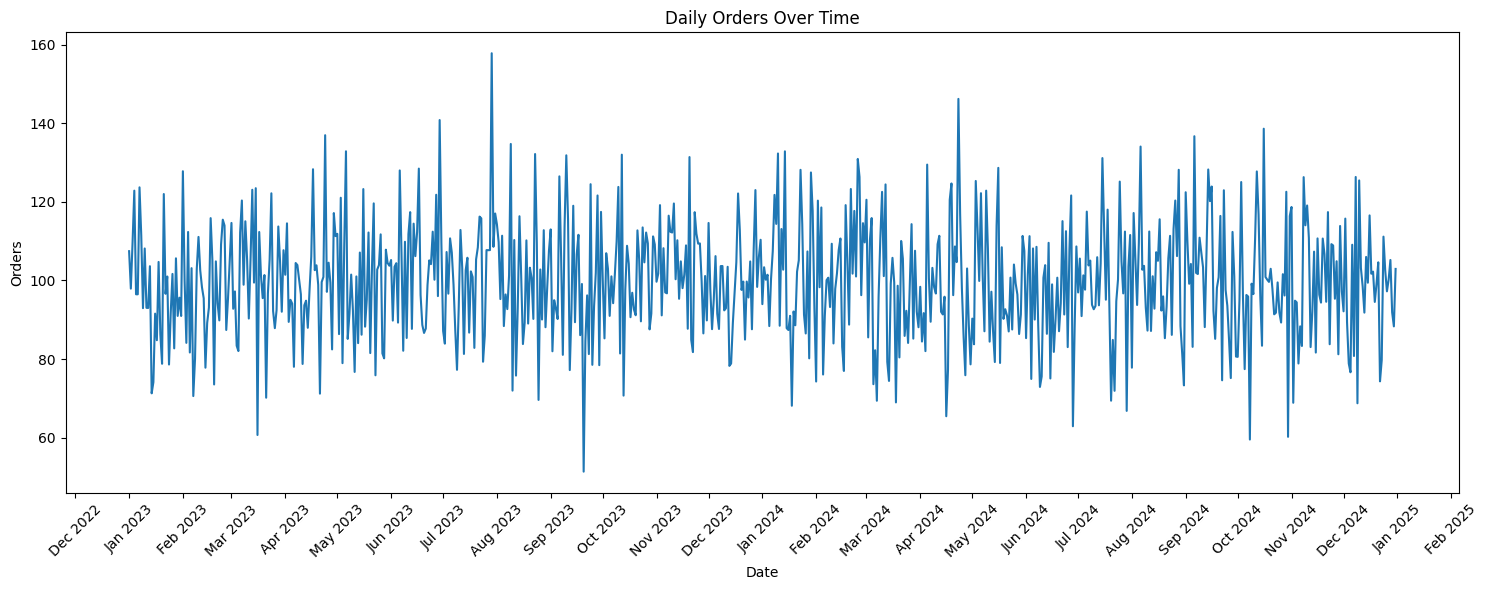

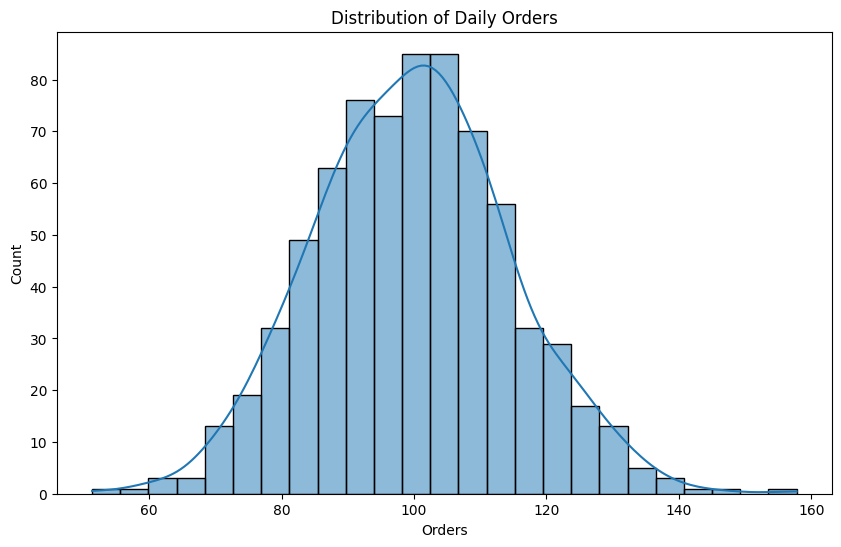

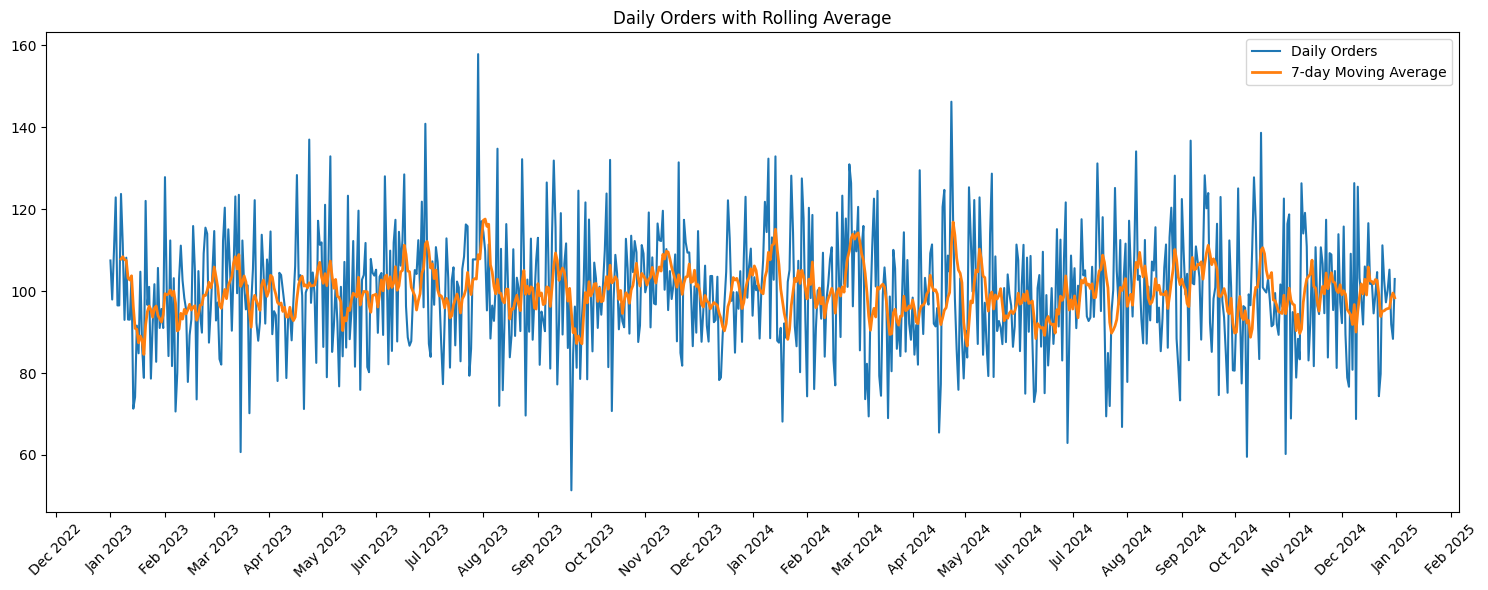

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates  # Add this import

# Generate sample data for a full year
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
np.random.seed(42)
orders = np.random.normal(100, 15, len(dates))
sorted_df = pd.DataFrame({'Date': dates, 'Orders': orders})

# Time Series Visualization
plt.figure(figsize=(15, 6))
sns.lineplot(data=sorted_df, x='Date', y='Orders')
plt.title('Daily Orders Over Time')
plt.xticks(rotation=45)
# Improve x-axis readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Fixed: use mdates.MonthLocator
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Fixed: use mdates.DateFormatter
plt.tight_layout()

# Statistical Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=sorted_df, x='Orders', kde=True)
plt.title('Distribution of Daily Orders')

# Interactive Plotly Visualization
fig = px.line(sorted_df, x='Date', y='Orders',
              title='Interactive Daily Orders Trend')
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Orders",
    hovermode='x unified',
    xaxis=dict(
        tickformat="%b %Y",
        tickangle=45,
        dtick="M1"
    )
)

# Rolling Statistics
sorted_df['7_day_rolling_avg'] = sorted_df['Orders'].rolling(window=7).mean()
plt.figure(figsize=(15, 6))
plt.plot(sorted_df['Date'], sorted_df['Orders'], label='Daily Orders')
plt.plot(sorted_df['Date'], sorted_df['7_day_rolling_avg'], 
         label='7-day Moving Average', linewidth=2)
plt.title('Daily Orders with Rolling Average')
plt.legend()
# Improve x-axis readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Fixed: use mdates.MonthLocator
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Fixed: use mdates.DateFormatter
plt.xticks(rotation=45)
plt.tight_layout()

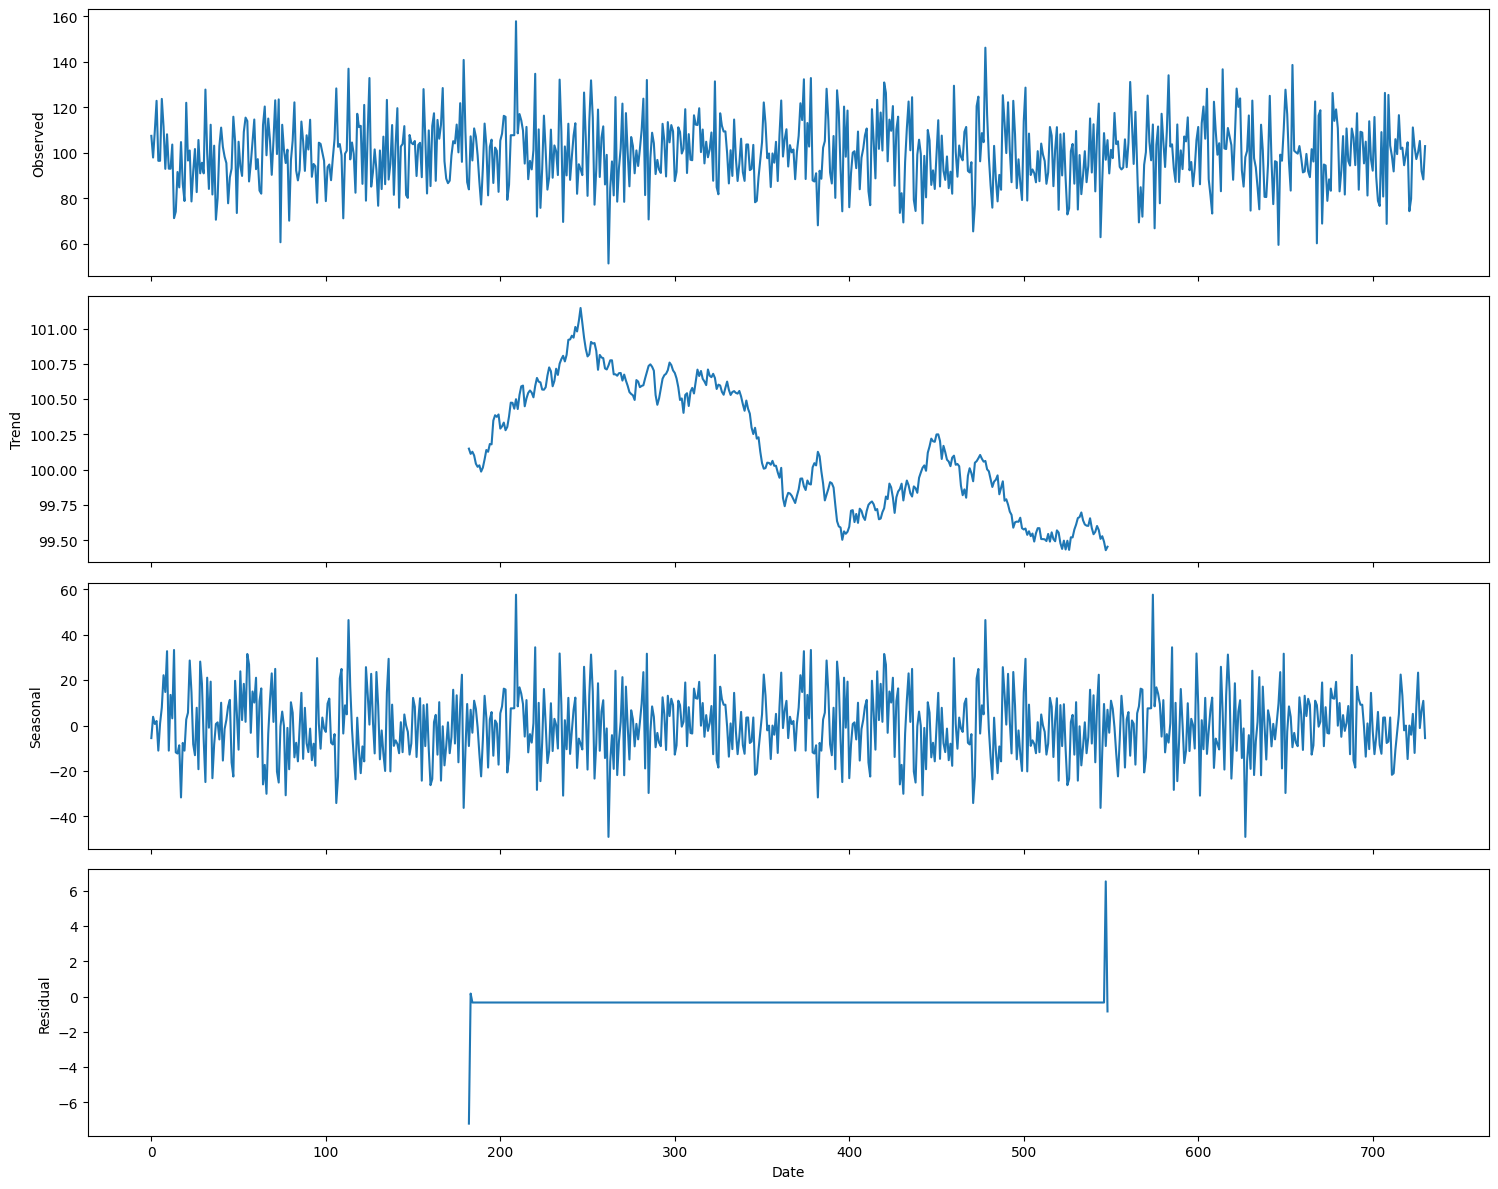

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(sorted_df['Orders'], model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

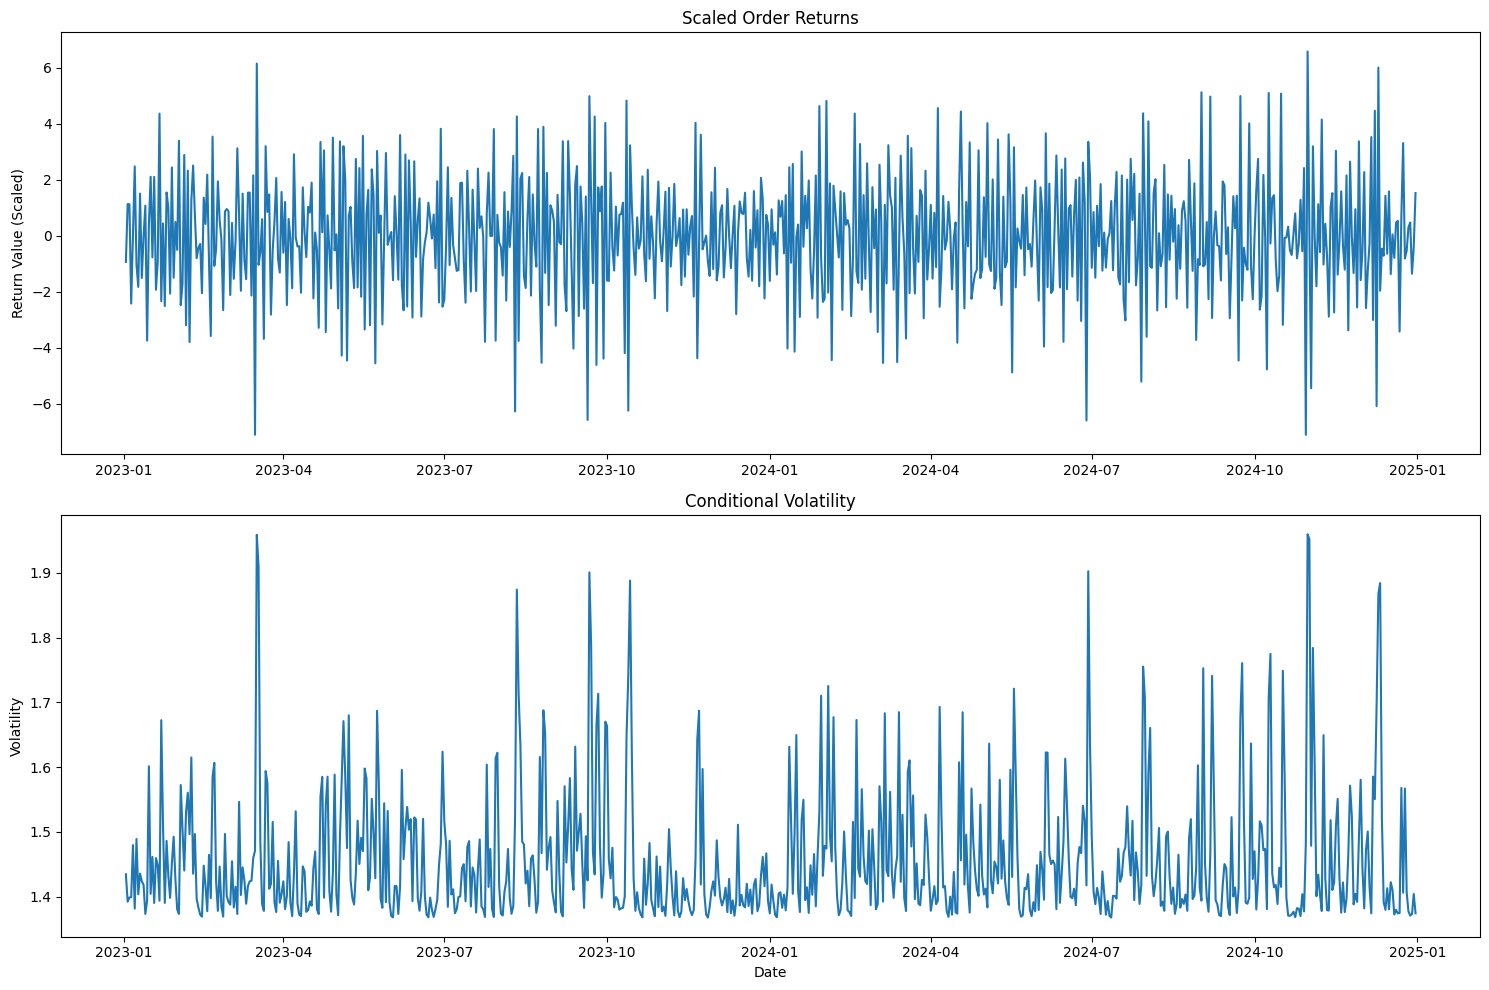

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1583.38
Distribution:                  Normal   AIC:                           3174.76
Method:            Maximum Likelihood   BIC:                           3193.13
                                        No. Observations:                  730
Date:                Tue, Jan 14 2025   Df Residuals:                      729
Time:                        15:46:26   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0324  6.524e-02     -0.497      0.619 [ -0.160,

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Convert the sorted_df to a time series
date_column = sorted_df.columns[0]  # First column should be the date
orders_column = sorted_df.columns[1]  # Second column should be orders

try:
    # Set the date as index
    sorted_df.set_index(date_column, inplace=True)
    
    # Calculate log returns and rescale by multiplying by 10
    sorted_df['log_returns'] = np.log(sorted_df[orders_column]).diff() * 10
    returns = sorted_df['log_returns'].dropna()
    
    # Fit GARCH(1,1) model
    model = arch_model(returns, vol='Garch', p=1, q=1)
    results = model.fit(disp='off')
    
    # Plot the original returns and volatility
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot returns
    ax1.plot(returns)
    ax1.set_title('Scaled Order Returns')
    ax1.set_ylabel('Return Value (Scaled)')
    
    # Plot conditional volatility
    ax2.plot(np.sqrt(results.conditional_volatility))
    ax2.set_title('Conditional Volatility')
    ax2.set_ylabel('Volatility')
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()
    
    # Print model summary
    print(results.summary())

except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nDataframe information:")
    print(sorted_df.info())